# **TD5**

# **Partie3: TopicModeling with LDA**

source: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = []
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingPrologue.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap1.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap2.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap3.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap4.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap5.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap6.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap7.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap8.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap9.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap10.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap11.txt", encoding="latin-1").read())
file.append(open("/content/drive/My Drive/DataSet/texte/LordOfTheRingChap12.txt", encoding="latin-1").read())

In [ ]:
import pandas as pd
import os

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
import re
from sklearn.model_selection import cross_validate
from nltk.corpus import words
 
stopwords = stopwords.words('english') #on met set les stopwords en anglais
stopwords.append('said')
stopwords.append('many')
stopwords.append('still')
dictionary = set(words.words())
rmv_punct = str.maketrans('','',string.punctuation) #setting of the punctuation removal
lemmatizer = WordNetLemmatizer() #définition du lemmatizer
 
# Function : to preprocess words
# Parameter : textParam, text ; lem1Stem2, int, if =2 then we apply a stemmatization else a lemmatisation
# Returns : list of the most meaningful words (preprocessed)
def preProcessing(textParam):
  result = []
  items = textParam
  if (type(items)!=float):
    items = textParam.lower() #transform to lower case
    items = items.translate(rmv_punct) #remove punctuation
    items = re.sub(r'\d+','',items) #remove numbers
    tokens = word_tokenize(items) #tokenize words
    tok = [i for i in tokens if not i in stopwords] # list of the words in the text without stop words
    for w in tok:
      result.append(lemmatizer.lemmatize(w)) #lemmatisation
    i=0
    while i < len(result):
      if result[i] not in dictionary:
        result.remove(result[i])
      else:
        i=i+1
    return (result)
 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#On créé des phrases fait de token (sans stopwords)
data = []
for i in range(len(file)):
  data.append(' '.join(preProcessing(file[i])))

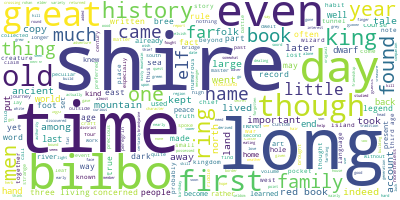

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = data[0]
for i in range(1,len(data)):
  long_string+data[i]


# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


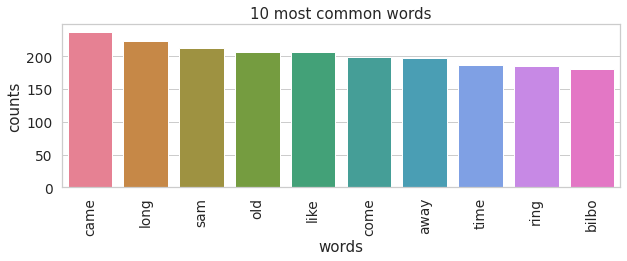

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(10, 3))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
long shire time day old like ring bilbo came great

Topic #1:
strider know say butterbur shall come sam help bree door

Topic #2:
tree merry path forest like come sam far suddenly way

Topic #3:
bilbo old say end come bag away dont time like

Topic #4:
sam came road away ring long pippin like strider come


In [ ]:
#!pip install pyLDAvis

In [ ]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
  LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

In [ ]:
from IPython.core.display import display, HTML

display(HTML(open("./ldavis_prepared_5.html", encoding="latin-1").read()))